In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from general_utils import utils
import pickle as pkl
import numpy as np
import importlib
import project_utils.PatientBootstrap as PBS
import os

utils.default_plot_format()

utils.pd_display_settings(3)


In [122]:
data_path = "processed_data/outliers_10min_Nabian_2025_02_27.pkl"

In [123]:


pickled = pd.read_pickle(data_path)
data = pickled["data"]
indicator_columns = pickled["indicator_columns"]
time_metrics = pickled["time_metrics"]
frequency_metrics = pickled["frequency_metrics"]
non_linear_metrics = pickled["non_linear_metrics"]

data.head()

,t_start,t_end,SDRR,RMSSD,pNN50 (%),Mean HR (bpm),ULF Power,ULF Peak Frequency,VLF Power,VLF Peak Frequency,...,UCr (g),UACR (mg÷g),Complications,Nephropathy,Retinopathy and cataract,DPN,Heart Disease,atherosclerosis or stenosis,Carotid Plaque,Condition
0,0.76,600.40,59.95,50.34,4.16,81.75,0.00417,0,3.31,0.03,...,NaN,NaN,0,0,0,False,0,0,0,Diabetes
1,601.06,1201,92.83,81.17,12.72,73.95,0.0364,0.00167,10.50,0.03,...,NaN,NaN,0,0,0,False,0,0,0,Diabetes
2,1202,1801,76.87,72.75,13.53,70.25,0.00296,0.00167,4.76,0.0267,...,NaN,NaN,0,0,0,False,0,0,0,Diabetes
3,1802,2402,65.98,54.86,10.43,71.96,0.0153,0,5.19,0.0384,...,NaN,NaN,0,0,0,False,0,0,0,Diabetes
4,2402,3002,56.02,32.69,3.59,78.11,0.0146,0,11.30,0.035,...,NaN,NaN,0,0,0,False,0,0,0,Diabetes


In [124]:
print("time_metrics =", time_metrics)
print("frequency_metrics =", frequency_metrics)
print("non_linear_metrics =", non_linear_metrics)

time_metrics = ['SDRR', 'RMSSD', 'pNN50 (%)', 'Mean HR (bpm)']
frequency_metrics = ['VLF Power', 'LF Power', 'HF Power', 'LF÷HF Ratio']
non_linear_metrics = ['S', 'SD1', 'SD2', 'SD1÷SD2', 'ApEn', 'SampEn', 'DFA α1', 'DFA α2', 'D2']


# Resample mean for each condition repeatedly


In [125]:
control_id = data[~data['DPN']].id.unique()
dpn_id = data[data['DPN']].id.unique()

print(control_id, dpn_id)

['19070921' '19072205' '19072214' '19072938' '19072939' '19072940'
 '19080106' '19081506' '19082406' '19090308' '19090320' '19102102'
 '19102524' '19112609' '19121303' '19121735' '20050628' '20052606'
 '20061729' '20120922' '20121033' '20121718'] ['19101619' '20010826' '20101822' '20123017']


In [126]:
sampler = PBS.PatientBootstrap(data, n = 100000)

for metric in indicator_columns:
    sampler.sample_dpn_control(metric, dpn_id=dpn_id, control_id=control_id)

bayes_table = sampler.evaluate_bayes_metrics()

display(bayes_table.sort_values('Bayes_p', ascending=True))

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,D2,0.00459,-4.05,0.64,-2.64,0.14
0,pNN50 (%),0.0258,4.10,3.17,13.06,2.67
0,SD2,0.0264,57.63,17.77,101.02,9.45
0,SDRR,0.0279,46.02,15.10,82.65,8.09
0,VLF Power,0.0441,1.70,1.56,5.44,1.38
0,SD1,0.0441,27.80,12.90,55.82,7.09
0,RMSSD,0.0444,39.31,18.27,78.83,10.01
0,LF Power,0.0545,34.25,34.59,117.21,33.50
0,HF Power,0.0685,510.28,577.31,1765,534.41
0,S,0.0733,9267,8111,25648,6365


## Bootstrapped Metric Distributions
### Bootstrapped Time Metrics

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SDRR,0.0279,46.02,15.10,82.65,8.09


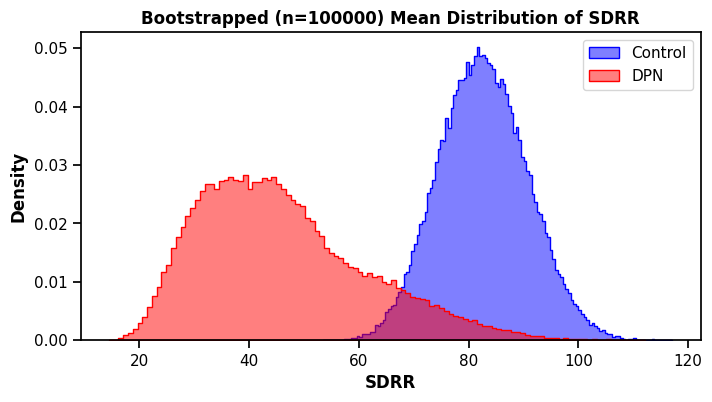

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,RMSSD,0.0444,39.31,18.27,78.83,10.01


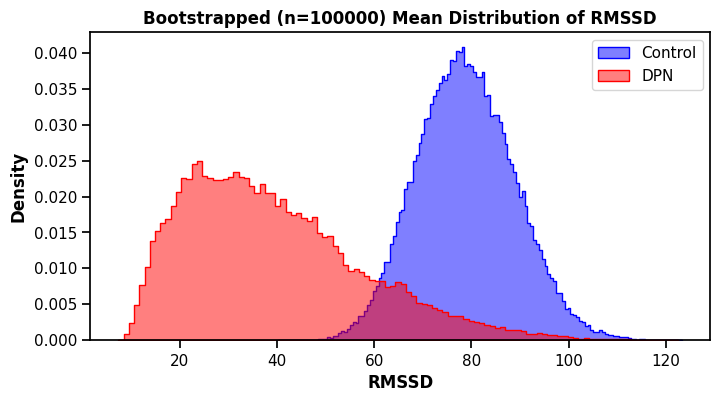

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,pNN50 (%),0.0258,4.10,3.17,13.06,2.67


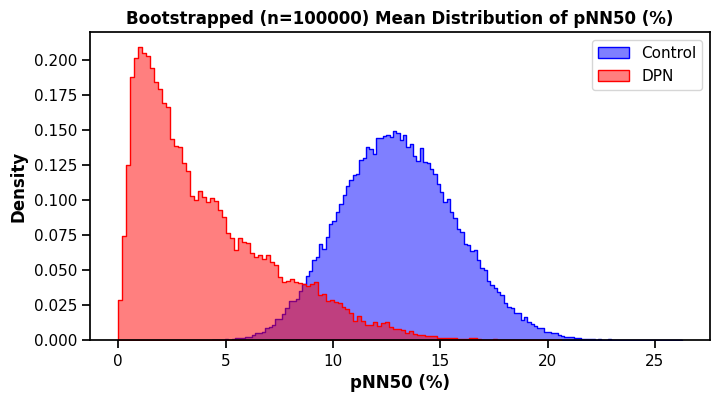

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,Mean HR (bpm),0.0828,82.57,4.81,75.25,1.99


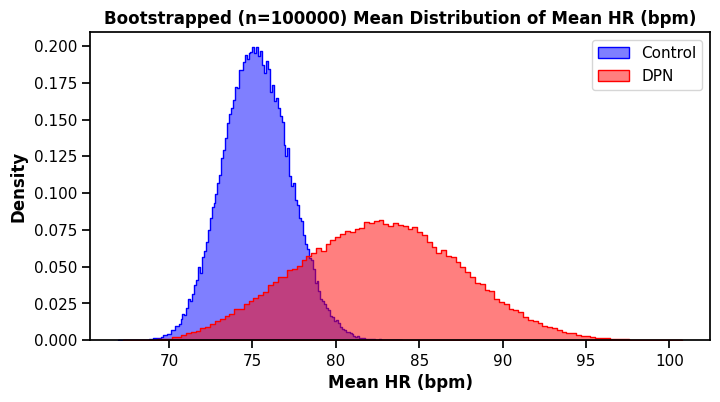

In [127]:
sampler.show_bayes_metrics(time_metrics)

### Bootstrapped Frequency Metrics

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,VLF Power,0.0441,1.70,1.56,5.44,1.38


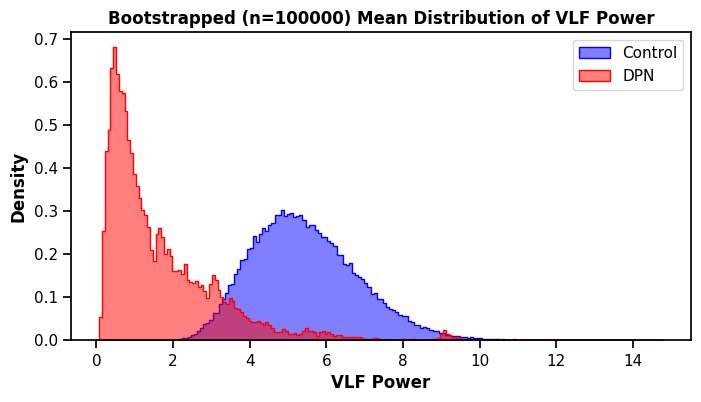

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,LF Power,0.0545,34.25,34.59,117.21,33.50


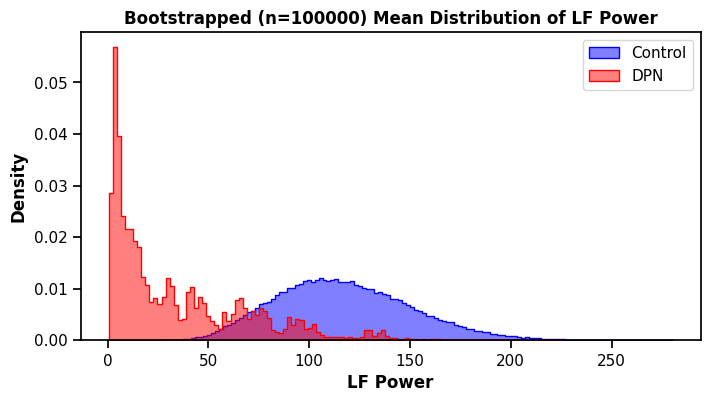

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,HF Power,0.0685,510.28,577.31,1765,534.41


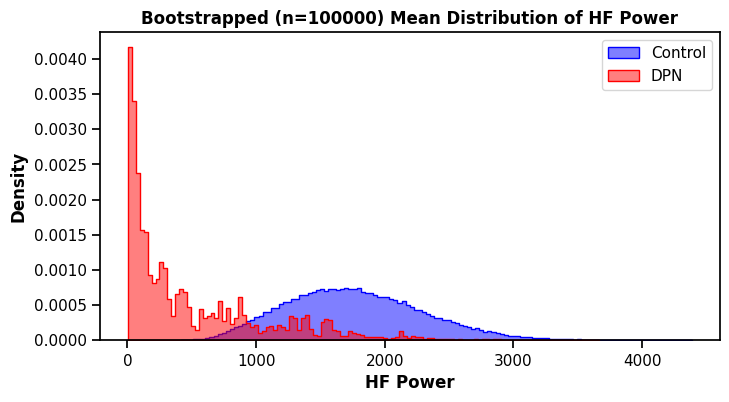

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,LF÷HF Ratio,0.40,0.12,0.046,0.12,0.0223


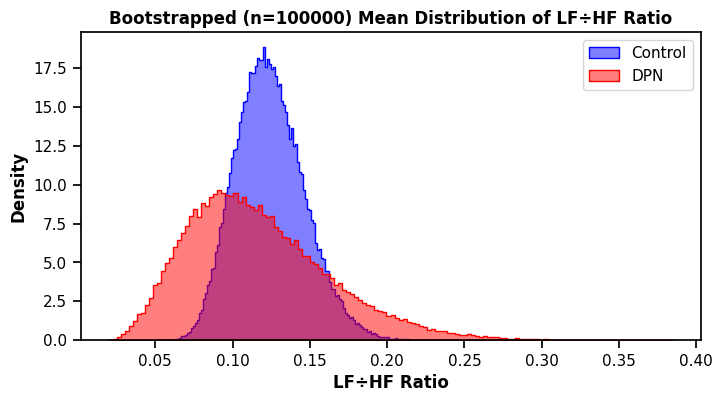

In [128]:
sampler.show_bayes_metrics(frequency_metrics)

There are significant issues with LF HF frequency calculation, as indicated by discontinuous means. 

### Bootstrapped Non Linear Metrics

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,S,0.0733,9267,8111,25648,6365


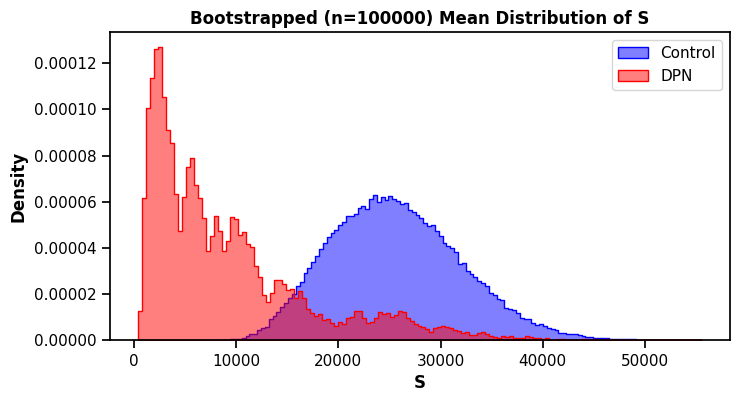

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SD1,0.0441,27.80,12.90,55.82,7.09


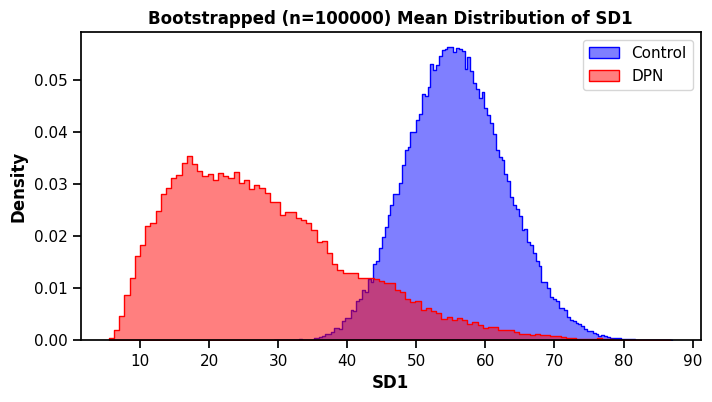

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SD2,0.0264,57.63,17.77,101.02,9.45


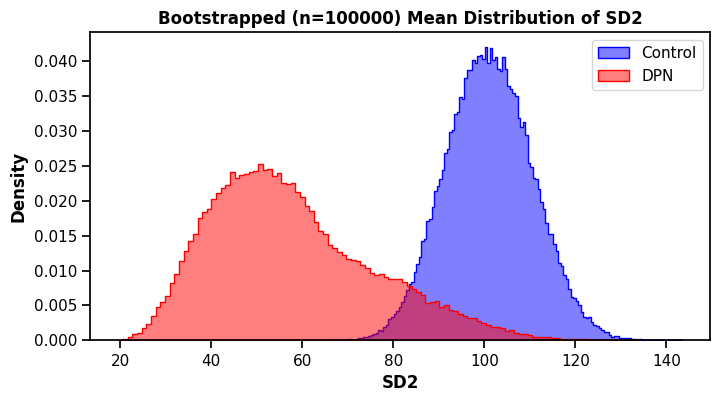

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SD1÷SD2,0.19,0.42,0.0984,0.51,0.0349


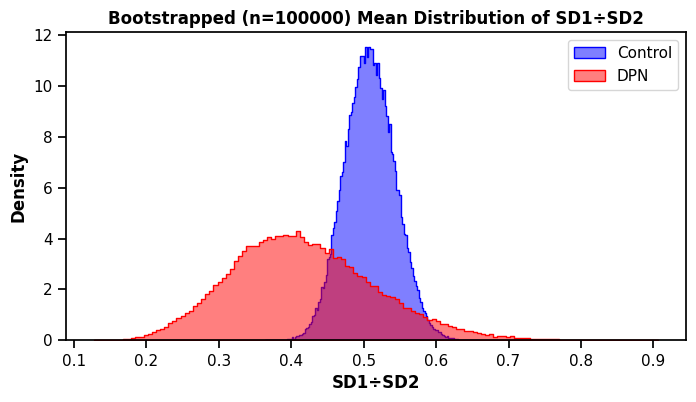

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,ApEn,0.41,0.98,0.15,0.95,0.0485


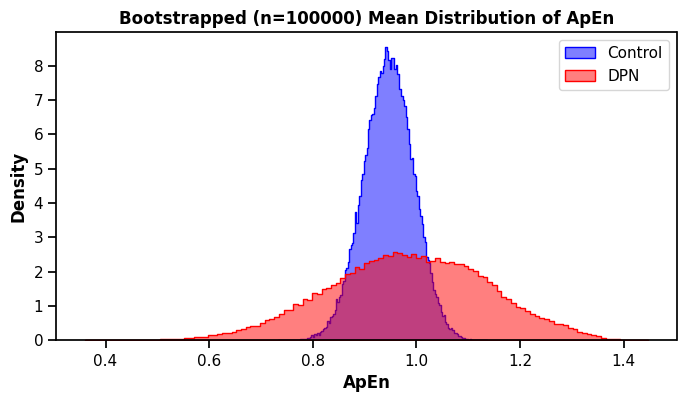

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SampEn,0.38,1.04,0.23,0.96,0.0738


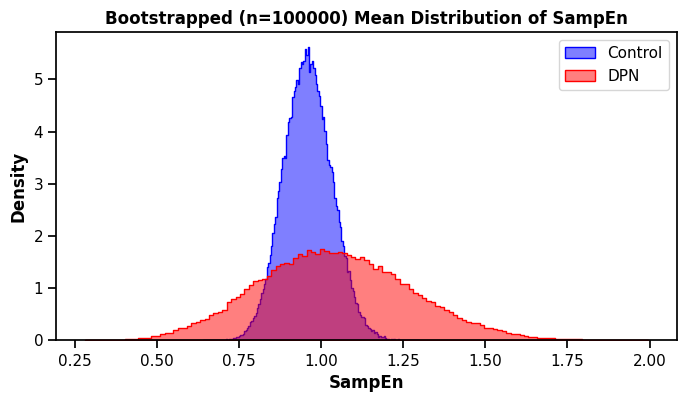

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,DFA α1,0.38,0.98,0.13,0.94,0.0401


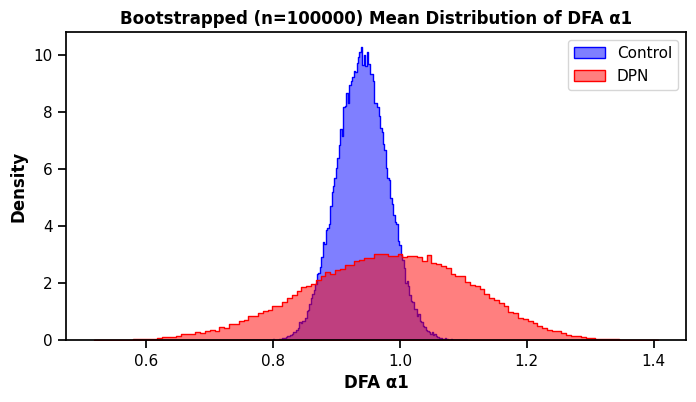

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,DFA α2,0.0752,1.00,0.10,0.84,0.0416


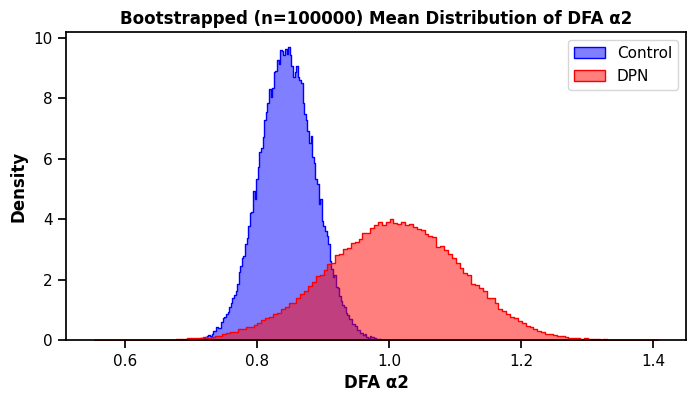

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,D2,0.00459,-4.05,0.64,-2.64,0.14


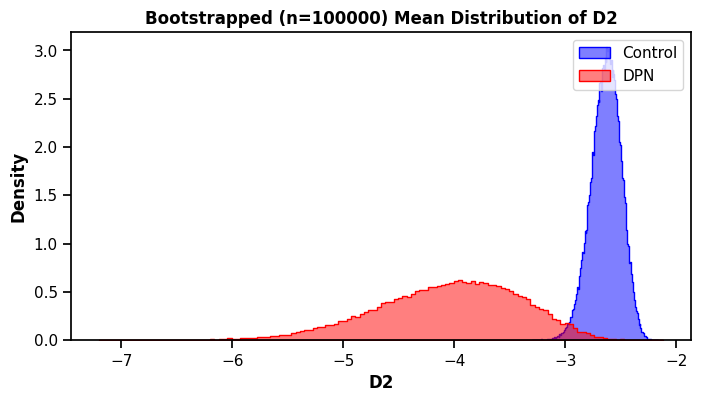

In [129]:
sampler.show_bayes_metrics(non_linear_metrics)

# Dumb classifier approach

this has yielded no good results

I have an idea that checking how suitable each value is for each population would allow me to classify the data

Construct a model that could tell how likely is each value to belong to one of the two pupulations.

Fit a gaussian model onto of each distribution.

In [130]:
from scipy.stats import norm

gaussian_dpn = {}
gaussian_controls ={}

for row in bayes_table.iterrows():
    metric = row[1]['Metric']

    dpn_mean = row[1]['DPN_Mean']
    dpn_std = row[1]['DPN_Std']
    gaussian_dpn[metric] = norm(dpn_mean, dpn_std)

    control_mean = row[1]['Control_Mean']
    control_std = row[1]['Control_Std']
    gaussian_controls[metric] = norm(control_mean, control_std)


calculate the chances of each value belonging to the distribution

In [131]:
chances = pd.DataFrame()
for row in data.iterrows():
  
    chance_dpn = {"x_"+metric: gaussian_dpn[metric].pdf(row[1][metric]) for metric in indicator_columns}

    chance_control = {"c_"+metric: gaussian_controls[metric].pdf(row[1][metric]) for metric in indicator_columns}
    
    chance_dpn = pd.Series(chance_dpn)
    chance_control = pd.Series(chance_control)

    result = {
        'DPN': row[1]['DPN'],
        'DPN_chance': chance_dpn.prod(),
        'control_chance': chance_control.prod(),
        **chance_dpn,
        **chance_control
    }


    chances = pd.concat([chances, pd.DataFrame([result])], ignore_index=True)

chances.tail()

,DPN,DPN_chance,control_chance,x_SDRR,x_RMSSD,x_pNN50 (%),x_Mean HR (bpm),x_VLF Power,x_VLF Peak Frequency,x_LF Power,...,c_LF÷HF Ratio,c_S,c_SD1,c_SD2,c_SD1÷SD2,c_ApEn,c_SampEn,c_DFA α1,c_DFA α2,c_D2
2678,True,1.43e-57,2e-118,2.27e-06,2.8e-10,0.0115,0.0354,0.23,70.49,0.0024,...,8.99,7.54e-06,1.01e-12,0.0106,8.39e-28,2.15e-08,9.01e-08,9.45e-10,3.83e-14,0.000918
2679,True,1.26e-86,4.14e-163,6.28e-06,2.94e-10,0.0868,0.0331,0.0128,105.04,8.86e-17,...,0.39,1.69e-05,1.12e-12,0.0311,2.65e-38,3.72e-18,2.66e-12,8.02e-16,2.79e-13,0.000131
2680,True,1.53e-42,3.38e-114,0.000358,2.87e-06,0.13,0.0144,0.17,42.70,0.00853,...,14.88,6.24e-05,4.94e-05,0.038,8.46e-21,1.32e-10,1.03e-06,2.84e-32,1.09,0.0563
2681,True,2.4e-112,5.29e-199,4.89e-11,4.79e-19,3.86e-21,0.0497,0.15,21.89,2.25e-05,...,0.13,4.41e-12,2.65e-33,7.1e-06,1.92e-43,5.85,0.0256,9.1e-22,6.29e-05,3.51e-05
2682,True,1.44e-155,1.48e-275,7.51e-18,1.15e-23,9.61e-09,0.0221,2.94e-10,22.11,1.94e-06,...,0.00545,3.16e-29,4.35e-45,2.13e-21,6.84e-17,6.45e-21,4.02e-18,1.52e-06,9.57,4.57e-20


In [132]:
chances["shows_dpn"] = chances["DPN_chance"] > chances["control_chance"]

chances["true_positive"] = chances["shows_dpn"] & chances["DPN"]
chances["false_positive"] = chances["shows_dpn"] & ~chances["DPN"]
chances["true_negative"] = ~chances["shows_dpn"] & ~chances["DPN"]
chances["false_negative"] = ~chances["shows_dpn"] & chances["DPN"]


results = {
    "true_positive": chances["true_positive"].mean(),
    "true_negative": chances["true_negative"].mean(),
    "false_positive": chances["false_positive"].mean(),
    "false_negative": chances["false_negative"].mean()
}

print(results)

{'true_positive': 0.16101379053298545, 'true_negative': 0.06708907938874395, 'false_positive': 0.7718971300782705, 'false_negative': 0.0}


In [133]:
for metric in indicator_columns:
    chances[f"x_higher_{metric}"] = chances[f"x_{metric}"] > chances[f"c_{metric}"]


chances["dpn_favoring_metrics_count"] = chances[[f"x_higher_{metric}" for metric in indicator_columns]].sum(axis=1)
chances["control_favoring_metrics_count"] = len(indicator_columns) - chances["dpn_favoring_metrics_count"]


chances["dpn_favor_percentage"] = chances["dpn_favoring_metrics_count"] / len(indicator_columns) * 100
chances["control_favor_percentage"] = chances["control_favoring_metrics_count"] / len(indicator_columns) * 100

metric_counts = {
    "avg_dpn_favoring_metrics": chances["dpn_favoring_metrics_count"].mean(),
    "avg_control_favoring_metrics": chances["control_favoring_metrics_count"].mean(),
    "avg_dpn_favor_percentage": chances["dpn_favor_percentage"].mean(),
    "avg_control_favor_percentage": chances["control_favor_percentage"].mean()
}

print("Average metrics per patient:")
for key, value in metric_counts.items():
    print(f"{key}: {value:.2f}")


print("\nAverage for actual DPN patients:")
print(f"dpn_favoring_metrics: {chances[chances['DPN']]['dpn_favoring_metrics_count'].mean():.2f}")
print(f"control_favoring_metrics: {chances[chances['DPN']]['control_favoring_metrics_count'].mean():.2f}")

print("\nAverage for actual control patients:")
print(f"dpn_favoring_metrics: {chances[~chances['DPN']]['dpn_favoring_metrics_count'].mean():.2f}")
print(f"control_favoring_metrics: {chances[~chances['DPN']]['control_favoring_metrics_count'].mean():.2f}")

Average metrics per patient:
avg_dpn_favoring_metrics: 14.75
avg_control_favoring_metrics: 5.25
avg_dpn_favor_percentage: 73.73
avg_control_favor_percentage: 26.27

Average for actual DPN patients:
dpn_favoring_metrics: 16.85
control_favoring_metrics: 3.15

Average for actual control patients:
dpn_favoring_metrics: 14.34
control_favoring_metrics: 5.66
